## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Reading the dataset

### Feature Description

__Features__ 

*price* : price in US dollars ($326 - $18,823 )

*carat* : weight of the diamond (0.2 - 5.01)

*cut*   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

*color* : diamond colour, from J (worst) to D (best)

*clarity* : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

*x* : length in mm (0 - 10.74)

*y* : width in mm (0 - 58.9)

*z* : depth in mm (0 - 31.8)

*depth* : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

*table* : width of top of diamond relative to widest point (43 - 95)

In [2]:
data_df = pd.read_csv('diamonds.csv') # reading the csv file
data_df.head() # first 5 rows of the data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print('The dataset has {} rows and {} columns. '.format(data_df.shape[0], data_df.shape[1])) # shape of the data

The dataset has 53940 rows and 10 columns. 


In [4]:
data_df.describe() #descriptive statistics of the data

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Cleaning

In [5]:
# renaming columns in the dataframe
# x - length (mm) 
# y - width (mm)
# z - depth (mm)

data_df.rename(columns = {'x' : 'length (mm)', 'y' : 'width (mm)', 
                          'z' : 'height (mm)'}, inplace = True)

In [6]:
data_df.isna().sum() # checking na values in the dataframe

carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
length (mm)    0
width (mm)     0
height (mm)    0
dtype: int64

### Length, Width and Height

From the describe function we can see that in these columns the minimum value is 0. Which is not possible. Let's take a look at it.

In [7]:
data_df[(data_df['length (mm)'] == 0) | (data_df['width (mm)'] == 0) | (data_df['height (mm)'] == 0)].shape

(20, 10)

Since there are only 20 such rows we can delete these rows before the analysis 

In [8]:
# getting the index values of those data points

idx = data_df[(data_df['length (mm)'] == 0) | (data_df['width (mm)'] == 0) | (data_df['height (mm)'] == 0)].index

data_df.drop(index = idx, inplace = True) # dropping those rows 

In [9]:
# confirmation of the row removal

data_df[(data_df['length (mm)'] == 0) | (data_df['width (mm)'] == 0) | (data_df['height (mm)'] == 0)].shape

(0, 10)

In [10]:
data_df.columns # all the columns in the dataframe

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'length (mm)', 'width (mm)', 'height (mm)'],
      dtype='object')

In [11]:
# rearraing the columns in the dataframe

data_df = data_df[['carat', 'cut', 'color', 'clarity', 'length (mm)', 'width (mm)', 'height (mm)',
                   'depth', 'table', 'price']]

In [12]:
data_df.head()

,carat,cut,color,clarity,length (mm),width (mm),height (mm),depth,table,price
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,326
1,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,326
2,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,327
3,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,334
4,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,335


## Feature Engineering 

### Correlation Plot

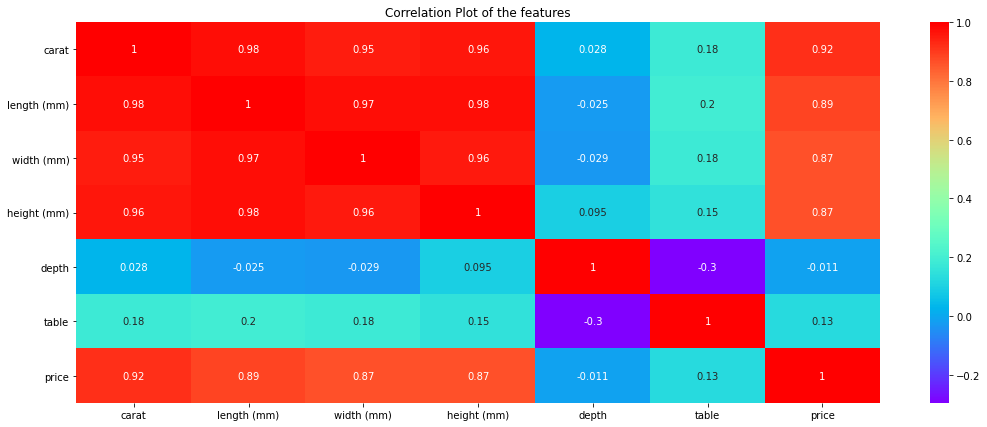

In [13]:
plt.figure(figsize = (18, 7))

sns.heatmap(data_df.corr(), annot = True, cmap = 'rainbow')
plt.title('Correlation Plot of the features')
plt.show()

__Observation:__

* Here we can see that carat, length, width and height have a good correlation with the target column price.
* But the is that carat, length, width and height are highly correlated with each other causing multicollinearity.
* It can be handled by creating new features or deleting the highly correlated features.

__Observation:__

* Now we can see that only carat and volume have a good correlation with target column price.

In [14]:
# creating a new feature volume using the length, width and height features

data_df['Volume'] = data_df['length (mm)'] * data_df['width (mm)'] * data_df['height (mm)']
data_df.head()

,carat,cut,color,clarity,length (mm),width (mm),height (mm),depth,table,price,Volume
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,335,51.917250


In [15]:
# dropping the length (mm), width (mm), height (mm) column from the dataframe

data_df.drop(columns = ['length (mm)', 'width (mm)', 'height (mm)'], axis = 1, inplace = True)

### Correlation plot

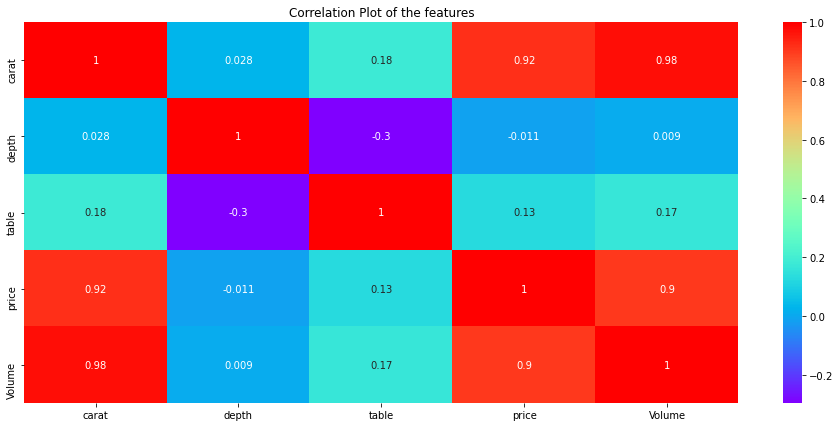

In [16]:
plt.figure(figsize = (16, 7))

sns.heatmap(data_df.corr(), annot = True, cmap = 'rainbow')
plt.title('Correlation Plot of the features')
plt.show()

## EDA

### Univariate Analysis

In [17]:
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font_scale = 0.8)

#### Carat

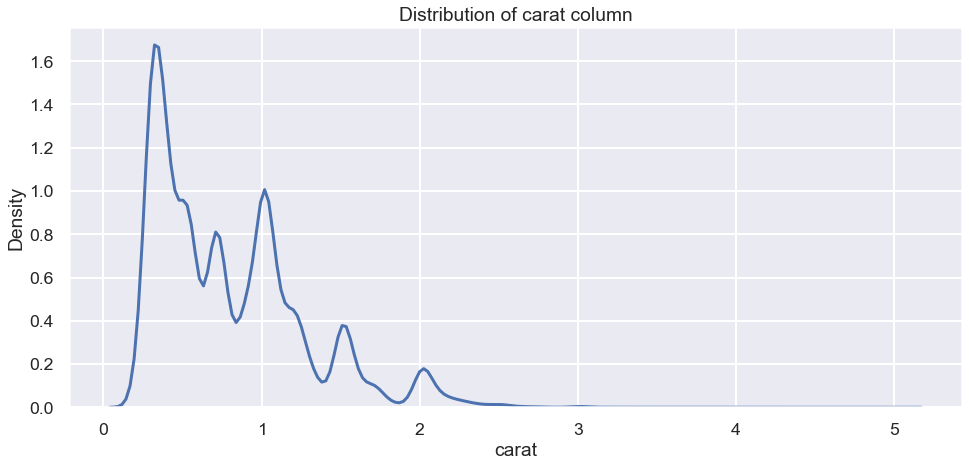

In [18]:
plt.figure(figsize = (16, 7))

sns.distplot(data_df['carat'], hist = False) # distplot
plt.title('Distribution of carat column') # title
plt.show()

__Observation:__

* Here we can see that most of the diamonds are around 0 and 1.
* As the number of carat increases the numnber of diamoinds decreases.

#### Depth and Table

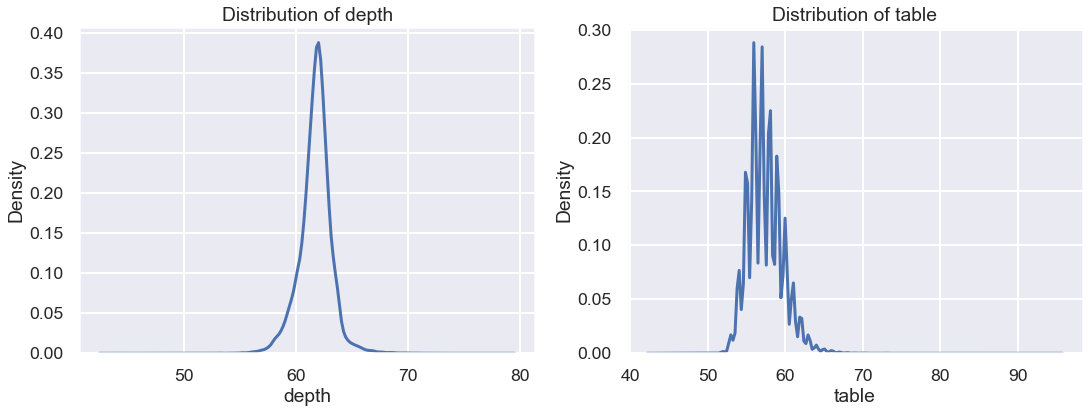

In [19]:
plt.figure(figsize = (18, 6))

# subplot on row - 1 column - 1
plt.subplot(121)
sns.distplot(data_df['depth'], hist = False) # distplot
plt.title('Distribution of depth') # title

# subplot on row - 1 column - 2
plt.subplot(122)
sns.distplot(data_df['table'], hist = False) # distplot
plt.title('Distribution of table') # title

plt.show()

#### Price

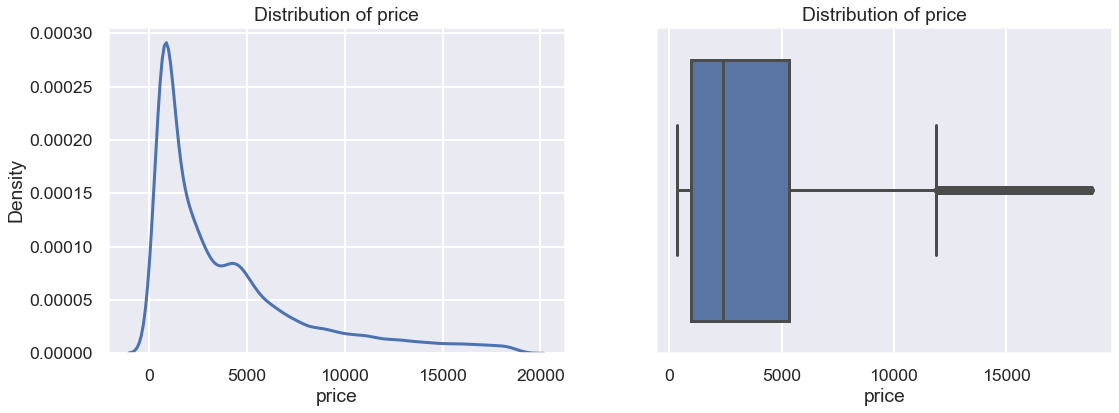

In [20]:
plt.figure(figsize = (18, 6))

# subplot on row - 1 column - 1
plt.subplot(121)
sns.distplot(data_df['price'], hist = False) # distplot
plt.title('Distribution of price') # title

# subplot on row - 1 column - 2
plt.subplot(122)
sns.boxplot(data_df['price']) # boxplot
plt.title('Distribution of price') # title

plt.show()

__Observation:__

* Here we can see that ditribution is right skewed and also there are some outliers present in the price column.

#### Cut

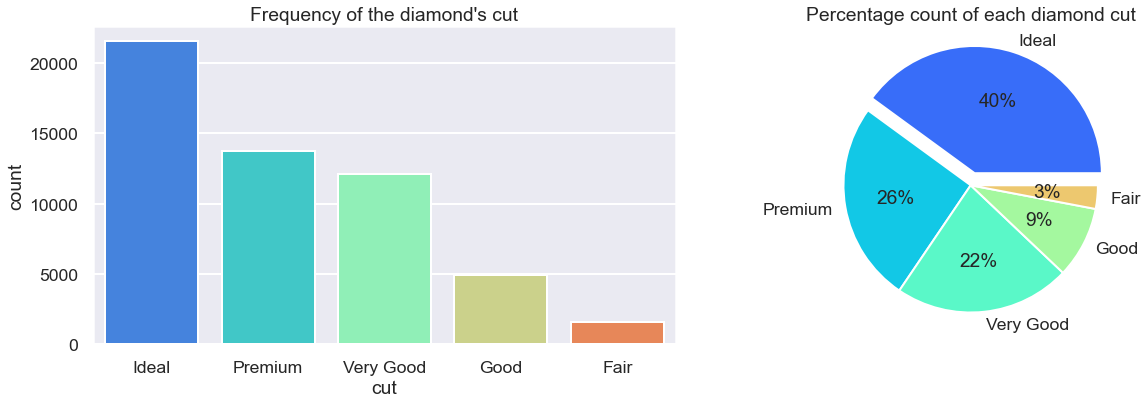

In [21]:
plt.figure(figsize = (18, 6))

# subplot on row - 1 column - 1
plt.subplot(121)
# countplot
sns.countplot(data_df['cut'], order = data_df['cut'].value_counts().index,
             palette = 'rainbow')
plt.title('Frequency of the diamond\'s cut') # title

# subplot on row - 1 column - 2
plt.subplot(122)
colors = sns.color_palette('rainbow')[0:5] # getting the colors
# pie chart
plt.pie(data_df['cut'].value_counts(), labels = data_df['cut'].value_counts().index, 
        autopct = '%.0f%%', explode = [0.1, 0, 0, 0, 0], colors = colors)
plt.title('Percentage count of each diamond cut') # title

plt.tight_layout()

__Observation:__

* We can see that most of the ideally cut and it makes up about 40% of the dataset.
* Ideal, Premium and Very Good cuts make up to 90% of the dataset. 

#### Color

In [22]:
len(data_df['color'].value_counts())

7

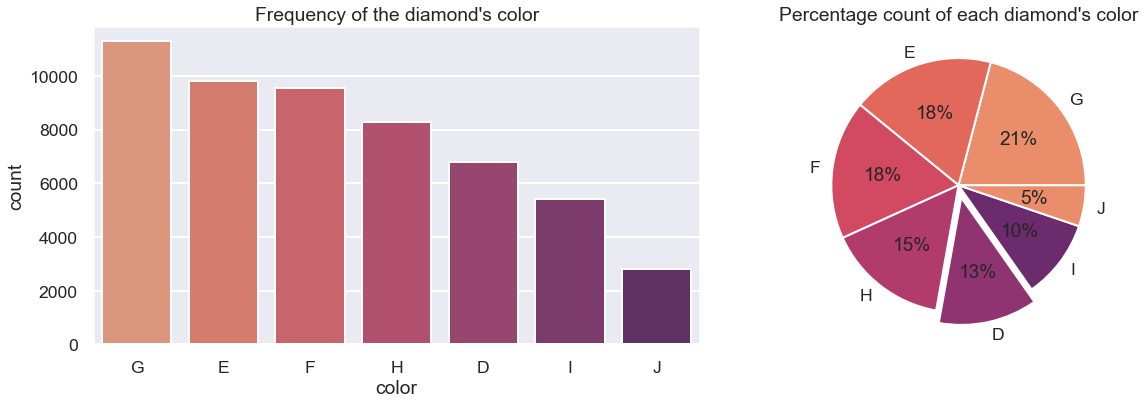

In [23]:
plt.figure(figsize = (18, 6))

# subplot on row - 1 column - 1
plt.subplot(121)
# countplot
sns.countplot(data_df['color'], order = data_df['color'].value_counts().index,
             palette = 'flare')
plt.title('Frequency of the diamond\'s color')

# subplot on row - 1 column - 2
plt.subplot(122)
colors = sns.color_palette('flare')[0:6] # getting the colors
# pie chart
plt.pie(data_df['color'].value_counts(), labels = data_df['color'].value_counts().index, 
        autopct = '%.0f%%', explode = [0, 0 , 0, 0, 0.1, 0, 0], colors = colors)
plt.title('Percentage count of each diamond\'s color') # title

plt.tight_layout()

__Observation:__

* Here we can see that G, E, F, H are frequently acquired color of the diamond.
* The best color D is about 13% and the worst color J is of 5%.

#### Clarity

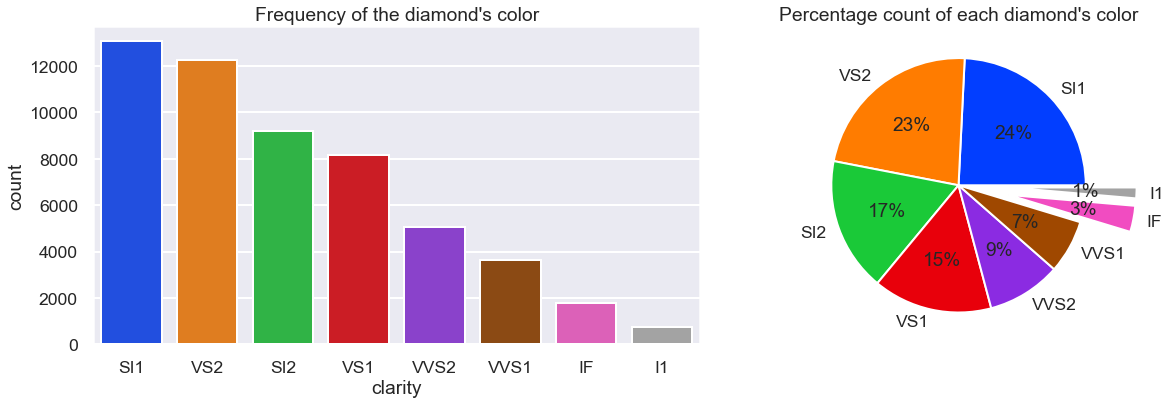

In [24]:
plt.figure(figsize = (18, 6))

# subplot on row - 1 column - 1
plt.subplot(121)
# countplot
sns.countplot(data_df['clarity'], order = data_df['clarity'].value_counts().index,
             palette = 'bright')
plt.title('Frequency of the diamond\'s color')

# subplot on row - 1 column - 2
plt.subplot(122)
colors = sns.color_palette('bright')[0:len(data_df['clarity'].value_counts().index)] # getting the colors
# pie chart
plt.pie(data_df['clarity'].value_counts(), labels = data_df['clarity'].value_counts().index, 
        autopct = '%.0f%%', explode = [0, 0, 0, 0, 0, 0, 0.4, 0.4], colors = colors)
plt.title('Percentage count of each diamond\'s color') # title

plt.tight_layout()

__Observation:__

* Here we can see that most diamonds are of clarity SI1, VS2, SI2, VVS2. 
* The best clarity IF is only about 3% and the worst clarity I1 is only about 1%.

### Bivariate Analysis

#### Carat and Price

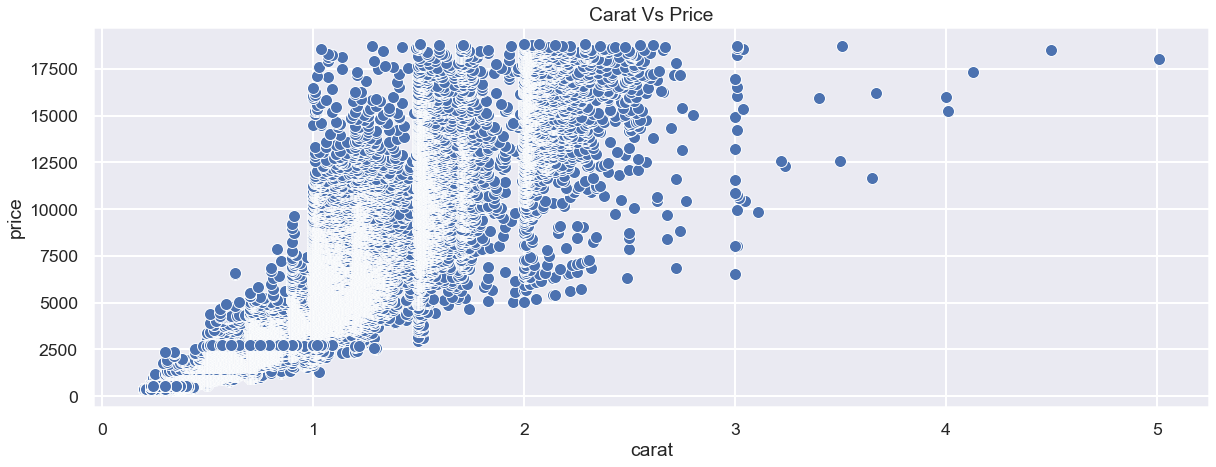

In [25]:
plt.figure(figsize = (20, 7))

# scatterplot
sns.scatterplot(data_df['carat'], data_df['price'])
plt.title('Carat Vs Price') # title
plt.show()

__Observation:__

* Here we can there is no absolute pattern with between carat and price.

#### Carat Vs Price Vs Clarity

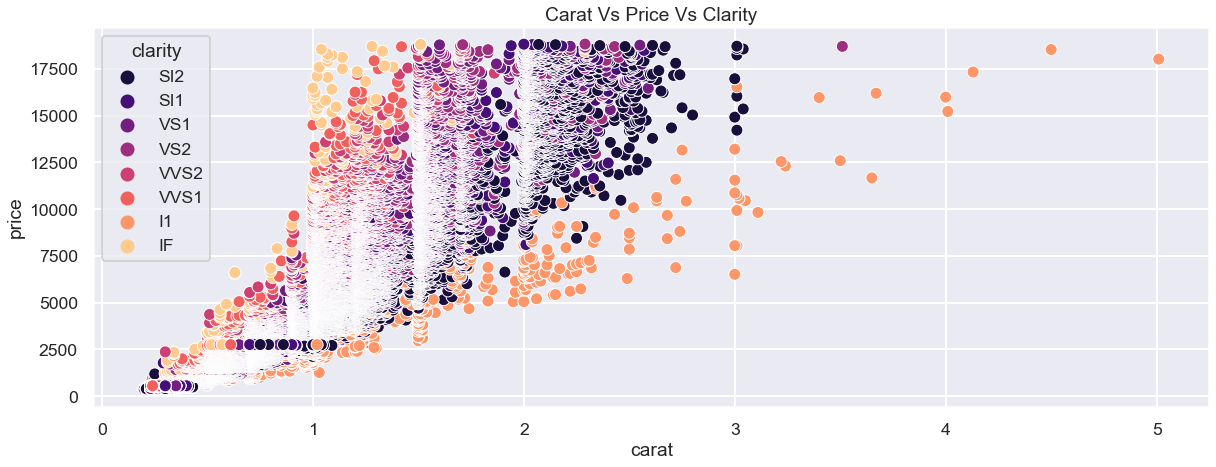

In [26]:
plt.figure(figsize = (20, 7))

# scatterplot with hue parameter
sns.scatterplot(data_df['carat'], data_df['price'], hue = data_df['clarity'], palette = 'magma')
plt.title('Carat Vs Price Vs Clarity') # title
plt.show()

__Observation:__

* Here we can see that there is linear relationship between the carat and price of the diamonds of clarity I1 which the worst clarity type.

#### Cut Vs Price

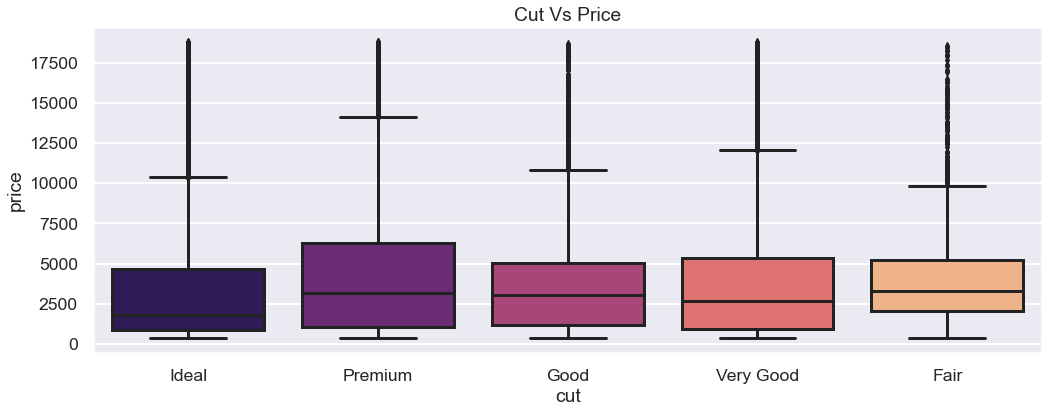

In [27]:
plt.figure(figsize = (17, 6))

# boxplot
sns.boxplot(data_df['cut'], data_df['price'], palette = 'magma')
plt.title('Cut Vs Price') # title
plt.show()

In [28]:
data_df.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1609.0,4357.500932,3561.136245,337.0,2050.00,3282.0,5198.00,18574.0
Good,4902.0,3926.403509,3676.772435,327.0,1144.25,3050.5,5028.00,18707.0
Ideal,21548.0,3456.941201,3808.093737,326.0,878.00,1809.5,4678.00,18806.0
Premium,13780.0,4579.684543,4343.906282,326.0,1046.00,3182.0,6290.25,18823.0
Very Good,12081.0,3981.664101,3936.010981,336.0,912.00,2647.0,5373.00,18818.0


__Observation:__

* We can see that most of the despite their cut have a mean value closer to 4000.
* As the name suggests Premium has a higher average price compared to other diamond cuts.

#### Color Vs Price

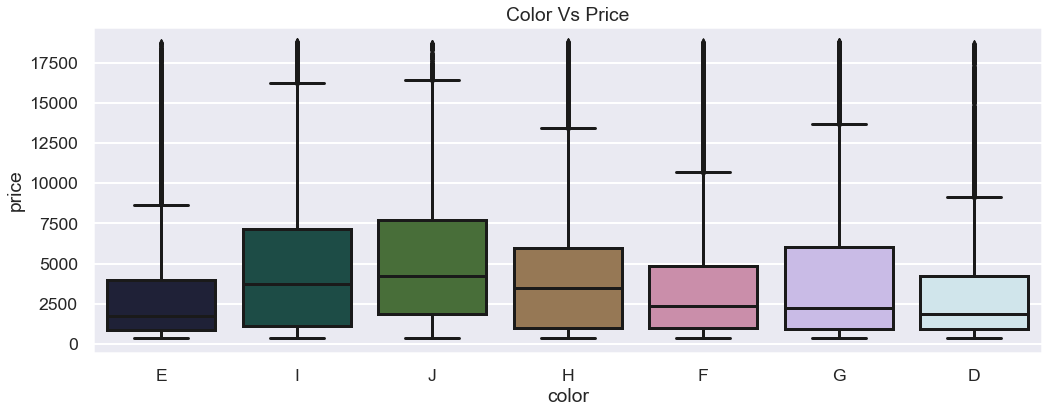

In [29]:
plt.figure(figsize = (17, 6))

# boxplot
sns.boxplot(data_df['color'], data_df['price'], palette = 'cubehelix')
plt.title('Color Vs Price') # title
plt.show()

In [30]:
data_df.groupby('color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6774.0,3168.106436,3353.391411,357.0,911.0,1836.5,4212.50,18693.0
E,9797.0,3076.752475,3344.158685,326.0,882.0,1739.0,4003.00,18731.0
F,9538.0,3725.080205,3785.694119,342.0,982.0,2343.5,4868.25,18791.0
G,11284.0,3996.876551,4049.165898,354.0,931.0,2240.0,6048.00,18818.0
H,8298.0,4480.942155,4208.831366,337.0,984.0,3453.5,5975.00,18803.0
I,5421.0,5089.973990,4720.748071,334.0,1120.0,3730.0,7186.00,18823.0
J,2808.0,5323.818020,4438.187251,335.0,1860.5,4234.0,7695.00,18710.0


__Observation:__

* Here we can see that the worst diamond color J has a higher average price compared to the best color D.

## Encoding Categorical features

Since the values in the categorical feature has a rank we cannot use One Hot Encoding. In such cases we can Label Encoding.

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() # creating an instance

In [32]:
data_df['cut'] = encoder.fit_transform(data_df['cut']) # encoding cut feature
data_df['color']= encoder.fit_transform(data_df['color']) # encoding color feature
data_df['clarity']= encoder.fit_transform(data_df['clarity']) # encoding clarity feature

In [33]:
data_df.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


## Scaling Numeric columns

### Splitting the Data

In [34]:
X = data_df.drop(['price'], axis = 1) # dropping the target column
y = data_df['price']

In [35]:
from sklearn.model_selection import train_test_split

# train size - 70%   test size - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

In [36]:
print('The shape of X_train is :', X_train.shape)
print('The shape of X_test is :', X_test.shape)
print('The shape of y_train is :', y_train.shape)
print('The shape of y_test is :', y_test.shape)

The shape of X_train is : (37744, 7)
The shape of X_test is : (16176, 7)
The shape of y_train is : (37744,)
The shape of y_test is : (16176,)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # creating an instance of the scaler

In [38]:
# scaling the train data

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,carat,cut,color,clarity,depth,table,Volume
0,0.441709,0.433508,0.830818,-1.062925,0.588748,1.582390,0.416271
1,0.483750,-0.536629,0.242414,-1.062925,0.450073,-0.205539,0.529378
2,1.114367,-1.506767,-1.522798,-0.483589,-1.907411,2.923336,1.135834
3,-1.050751,1.403646,0.830818,1.254420,0.172722,0.688425,-1.063688
4,0.441709,1.403646,-0.345990,-1.062925,0.450073,1.135407,0.410961


In [39]:
# scaling the testing data

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,carat,cut,color,clarity,depth,table,Volume
0,0.441709,-1.506767,0.830818,-1.062925,1.559477,0.241443,0.429743
1,-0.987689,-0.536629,-0.934394,0.675084,-0.867345,-0.652521,-0.978746
2,0.231504,0.433508,-1.522798,-1.062925,0.727424,-0.205539,0.202849
3,-0.777484,0.433508,-0.345990,0.675084,-1.352709,0.241443,-0.769707
4,-0.840545,1.403646,-0.345990,1.833756,-0.867345,-0.205539,-0.836430


## KNN from Scratch

In [40]:
X_train_arr = np.array(X_train) # coverting X_train to an array
X_test_arr = np.array(X_test) # converting X_test to an array

In [41]:
y_train_arr = np.array(y_train).reshape(len(y_train), 1) # converting y_train to an array
y_test_arr = np.array(y_test).reshape(len(y_test), 1) # converting y_test to an array

In [42]:
y_pred_arr = np.zeros(y_test_arr.shape) # array of zeros
mu_y = np.mean(y_train_arr, 0) # mean of the y_train array
sigma_y = np.std(y_train_arr, 0, ddof = 0) # std of y_train array
y_train_arr = (y_train_arr - mu_y ) / sigma_y # normalizing y_train array

In [43]:
n_neigh = 10 # no of neighbhour
for row in range(len(X_test_arr)):
    # finding the distance
    euclidian_distance = np.sqrt(np.sum((X_train_arr - X_test_arr[row])**2, axis = 1 ))
    # finding the predictions
    y_pred_arr[row] = y_train_arr[np.argsort(euclidian_distance, axis = 0)[:n_neigh]].mean()* (sigma_y + mu_y)


#Finding the root mean squared error 
RMSE = np.sqrt(np.mean((y_test_arr - y_pred_arr)**2))
print(RMSE)

5548.136781968877


## KNN - Sklearn implementation

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

model = KNeighborsRegressor() # creating an instance

In [45]:
model.fit(X_train, y_train) # training the model

KNeighborsRegressor()

In [46]:
train_preds = model.predict(X_train) # predicting the training data
train_preds

array([4569.2, 4899. , 6250.6, ..., 5600. , 5131.6, 1135.2])

In [47]:
print('### TRAINING DATA ###\n')

print('The mean absolute error is {:.2f}'.format(mean_absolute_error(y_train, train_preds)))
print('The root mean squared error is {:.2f}'.format(mean_squared_error(y_train, train_preds, squared = False)))
print('The R2 score is {:.2f}'.format(r2_score(y_train, train_preds)))

### TRAINING DATA ###

The mean absolute error is 355.55
The root mean squared error is 667.36
The R2 score is 0.97


In [48]:
test_preds = model.predict(X_test) # predicting the test data
test_preds

array([4764.2,  895.6, 4769.6, ..., 2384. , 4098.6,  710.2])

In [49]:
print('### TESTING DATA ###\n')

print('The mean absolute error is {:.2f}'.format(mean_absolute_error(y_test, test_preds)))
print('The mean squared error is {:.2f}'.format(mean_squared_error(y_test, test_preds, squared = False)))
print('The R2 score is {:.2f}'.format(r2_score(y_test, test_preds)))

### TESTING DATA ###

The mean absolute error is 438.81
The mean squared error is 834.26
The R2 score is 0.96
